<a href="https://colab.research.google.com/github/MAHMUDSWE/ML/blob/main/Problem_set_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#Mounting Google Drive


In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Load Dataset

In [11]:
train_path = '/content/drive/MyDrive/Project/ML/problem01/train'
val_path = '/content/drive/MyDrive/Project/ML/problem01/val'
test_path = '/content/drive/MyDrive/Project/ML/problem01/test'

In [12]:
#set up data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
#set batch size and image dimensions
batch_size = 32
img_height, img_width = 150, 150

#Generate batches of augmented data

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Define and train the model

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Checking the sample and batch size for tranning purpose

In [15]:
print("Number of samples in the training set:", train_generator.samples)
print("Number of samples in the training set:", val_generator.samples)
print("Batch size:", batch_size)

Number of samples in the training set: 5216
Number of samples in the training set: 16
Batch size: 32


# Train model

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)

Epoch 1/10
163/163 [==============================] - 969s 5s/step - loss: 0.3663 - accuracy: 0.8443 - val_loss: 0.6027 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 347s 2s/step - loss: 0.2461 - accuracy: 0.8990 - val_loss: 0.4579 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 352s 2s/step - loss: 0.2076 - accuracy: 0.9170 - val_loss: 0.8243 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 356s 2s/step - loss: 0.1885 - accuracy: 0.9275 - val_loss: 0.3168 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 349s 2s/step - loss: 0.1773 - accuracy: 0.9306 - val_loss: 0.7071 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 356s 2s/step - loss: 0.1530 - accuracy: 0.9450 - val_loss: 0.7752 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 350s 2s/step - loss: 0.1352 - accuracy: 0.9503 - val_loss: 0.2533 - val_accuracy: 0.8750

# Generate test data

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 624 images belonging to 2 classes.


# Evaluate and print the accuracy of the model on test data

In [18]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print("test data accuracy: {:.2f}%".format(test_acc * 100))

20/20 [==============================] - 78s 4s/step - loss: 0.5936 - accuracy: 0.8510
test data accuracy: 85.10%


# Prediction on test data

In [19]:
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = (predictions > 0.5).astype(int)

20/20 [==============================] - 17s 832ms/step


# Printing classification report and confusion matrix

In [20]:
print("Classification Report:\n", classification_report(test_generator.classes, predicted_classes))
print("Confusion Matrix:\n", confusion_matrix(test_generator.classes, predicted_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.24      0.29       234
           1       0.63      0.76      0.69       390

    accuracy                           0.57       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.53      0.57      0.54       624

Confusion Matrix:
 [[ 56 178]
 [ 93 297]]


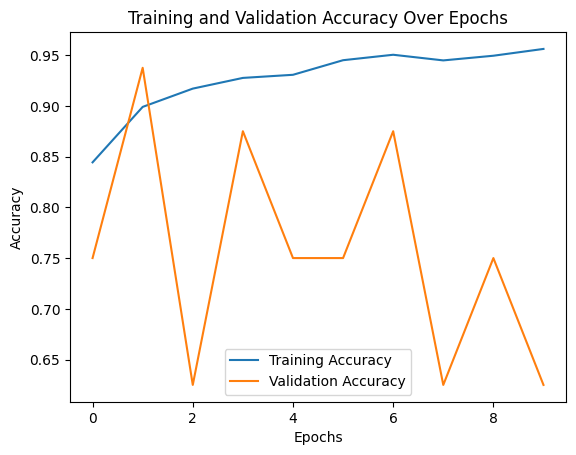

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Checking Model Accuracy

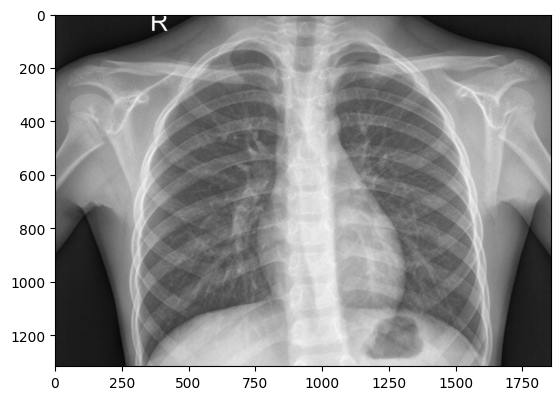

In [22]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/Project/ML/problem01/test/NORMAL/IM-0001-0001.jpeg')
plt.imshow(img)
plt.show()

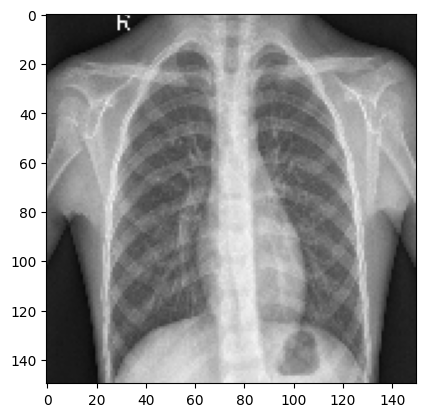

In [26]:
resize = tf.image.resize(img, (150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [27]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 140ms/step


In [28]:
if yhat > 0.5:
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is not Pneumonia')

Predicted class is not Pneumonia


# Checking Model Accuracy

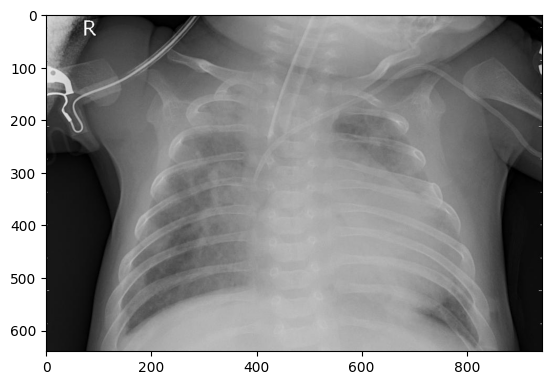

In [29]:
img2 = cv2.imread('/content/drive/MyDrive/Project/ML/problem01/test/PNEUMONIA/person1_virus_6.jpeg')
plt.imshow(img2)
plt.show()

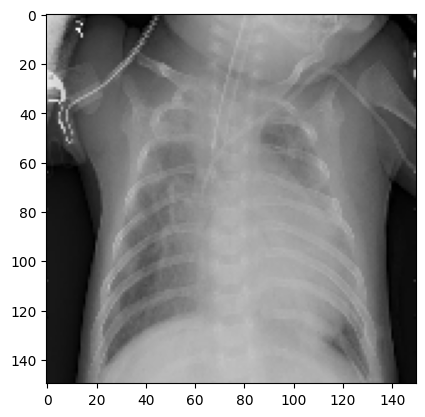

In [30]:
resize = tf.image.resize(img2, (150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


In [32]:
if yhat > 0.5:
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is not Pneumonia')

Predicted class is Pneumonia
